## Segmentación Automotora

In [5]:
library(dplyr) # for data cleaning
library(ISLR) # for college dataset
library(cluster) # for gower similarity and pam
library(Rtsne) # for t-SNE plot
library(compareGroups) #for compare group
library(ggplot2) # for visualization

In [38]:
setwd("C:/Users/alfredo/Documents/Diplomado")

In [42]:
df<-read.csv("./auto.txt", header=T, sep="\t" ,row.names="Rut")

In [43]:
head(df) #leemos los 5 primeras líneas

Marca,Modelo,Precio_LISTA,Bono_Dcto,Descto_Vendedor,Costo_Unidad,Total_Accesorios,Descto_Accesorios,Venta_Accesorios,Costo_Accesorios,Total_Tramites,Descto_Tramites,Sucursal,Condicion,Entidad_Financiera,Mantencion
DFSK,4621/TRUCK SC 1.3 R14 SERIE V EV/,7247100,833000,120000,6448372,35200,35200,0,35200,165080,0,BYD - ZX - JMC PLAZA OESTE,NUEVO Y SIN USO,FINANCIAMIENTO FORUM,No
DFSK,4671/580 1.5T LUXURY/,11990000,0,0,11030800,45200,45200,0,45200,0,0,BYD - ZX PLAZA TOBALABA,NUEVO Y SIN USO,FORUM SERVICIOS FINANCIEROS S.A.,No
DFSK,4672/580 1.8L COMFORT/,9990000,0,0,9190800,45200,45200,0,45200,0,0,BYD - ZX - JMC PLAZA OESTE,NUEVO Y SIN USO,FINANCIAMIENTO FORUM,No
DFSK,4622/TRUCK DC 1.3 R14 SERIE V EV/,7842100,357000,0,6995772,35200,35200,0,35200,0,0,DFSK JMC GRAN AVENIDA,NUEVO Y SIN USO,Sin Financiera,No
DFSK,4524/TRUCK SC XL 1.0 DA EV/,5462100,357000,105100,4806172,35200,35200,0,35200,0,0,DFSK JMC GRAN AVENIDA,NUEVO Y SIN USO,Sin Financiera,No
DFSK,4622/TRUCK DC 1.3 R14 SERIE V EV/,7842100,357000,157936,6995772,45200,45200,0,45200,0,0,DFSK JMC GRAN AVENIDA,NUEVO Y SIN USO,Sin Financiera,No


In [35]:
str(df) #revisamos las variables

'data.frame':	1321 obs. of  16 variables:
 $ Marca             : Factor w/ 21 levels "BYD","CHEVROLET",..: 3 3 3 3 3 3 3 3 3 10 ...
 $ Modelo            : Factor w/ 284 levels "0000/SAIL 1.4 MT LT/",..: 157 164 165 158 152 158 158 158 158 80 ...
 $ Precio_LISTA      : int  7247100 11990000 9990000 7842100 5462100 7842100 7842100 7842100 7842100 9390000 ...
 $ Bono_Dcto         : int  833000 0 0 357000 357000 357000 595000 595000 517000 840000 ...
 $ Descto_Vendedor   : int  120000 0 0 0 105100 157936 425535 238000 170100 0 ...
 $ Costo_Unidad      : int  6448372 11030800 9190800 6995772 4806172 6995772 6995772 6995772 6995772 8596899 ...
 $ Total_Accesorios  : int  35200 45200 45200 35200 35200 45200 30000 45200 30000 234470 ...
 $ Descto_Accesorios : int  35200 45200 45200 35200 35200 45200 30000 30000 30000 234470 ...
 $ Venta_Accesorios  : int  0 0 0 0 0 0 0 15200 0 0 ...
 $ Costo_Accesorios  : int  35200 45200 45200 35200 35200 45200 45200 45200 30000 234470 ...
 $ Total_Tramites  

 Tenemos variables númericas y categoricas, vamos a utilizar el coeficiente Gower en el dataframe

In [66]:
matDist<-daisy(df, metric = "gower")

In [92]:
set.seed(123)
mixedClusters<-kmeans(matDist, centers=3) #creamos 4 clusters

In [93]:
table(mixedClusters$cluster) #revisamos la segmentación


  1   2   3 
182 634 505 

In [94]:
df$cluster<-mixedClusters$cluster #almacenasmos el cluster

In [95]:
group<-compareGroups(cluster~.,data=df)

Warning message in compareGroups.default(X = X, y = y, include.label = include.label, :
"Variables 'Marca', 'Modelo', 'Sucursal', 'Entidad_Financiera' have been removed since some errors occurred"

In [96]:
clustab<-createTable(group)

In [97]:
clustab


--------Summary descriptives table by 'cluster'---------

__________________________________________________________________________________________ 
                                 1                 2                  3          p.overall 
                               N=182             N=634              N=505                  
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯ 
Precio_LISTA             8199852 (4441071) 14082936 (4824255) 11565406 (3755029)  <0.001   
Bono_Dcto                 32175 (150980)    681310 (637054)    510215 (269496)    <0.001   
Descto_Vendedor           281814 (546875)   532200 (458139)    348398 (298949)    <0.001   
Costo_Unidad             7234626 (4221610) 12848509 (4350910) 10668430 (3423080)  <0.001   
Total_Accesorios          63477 (484329)    113259 (187216)     103559 (91731)     0.035   
Descto_Accesorios          25966 (76062)     43726 (99894)      101655 (91139)    <0.001   
Venta_Accesorios     

ERROR: Error in points(cl$centers, col = 1:5, pch = 8): objeto 'cl' no encontrado


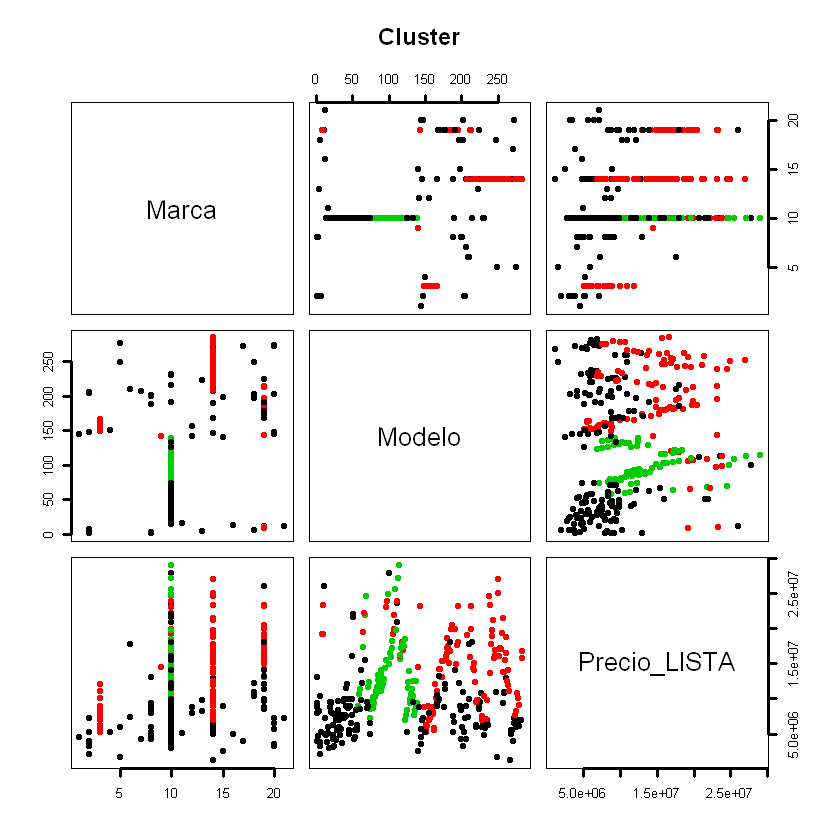

In [98]:
plot(df[,1:3], col=df$cluster, main="Cluster", pch=20, lwd=3)
points(cl$centers, col=1:5, pch=8)